**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 2: Machine Learning*

# Identification

Name: Shacha Parker<br/>
Student Number: 300235525

Name: Hasin Zaman<br/>
Student Number: 300148066

# 1. Exploratory Analysis

## Data Exploration

In this assignment, we will utilize the Diabetes Prediction Dataset, accessible via [Diabetes Prediction Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data). To mitigate the complexity associated with Kaggle's login requirement, the dataset has been made available on a public GitHub repository:

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2)

You can access and read the dataset directly from this GitHub repository in your Jupyter notebook.

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk

url = 'https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a2/diabetes_prediction_dataset.csv'

dataset = pd.read_csv(url)

# For convenience. display all data values.
pd.set_option("display.max_rows", None)
pd.set_option('display.max_columns', None)

1. **Load the dataset and provide a summary of its structure**:

    - Describe the features (columns), their data types, and the target variable.

In [96]:
# print(dataset.describe())
print(dataset.describe())

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

##### Features/Columns Types
**Gender**: String

**Age**: Float (All numbers above 1 could be interpreted as ints, but some numbers below 2 have decimal values.)

**Hypertenstion**: Int, but could be rendered as a boolean since there are only 0s and 1s.

**Heart Disease**: Int but can also be a bool for the same reason

**Smoking History**: String

**BMI**: Float

**HbA1c Level**: Float

**Blood Glucose Level**: Int

*Target Variable*: **Diabetes**: Int pseudo-boolean (only 1s and 0s)

2. **Feature Distribution Analysis**:

    - Examine the distribution of each feature using appropriate visualizations such as histograms and boxplots. Discuss insights gained, including the presence of outliers.

Proof of the metrics are printed under each graphic.

**Gender**: Simple bar chart

              ╔══════════════════════════════╗
       Female ╢██████████████████████████████╟ 58552
       Male   ╢█████████████████████░░░░░░░░░╟ 41430
              ╠══════════════════════════════╣
              0                              58552

The amount of female samples is larger than those of the males by a factor of about 1.4. This is not a large overshoot, but moderately significant.

In [97]:
print(dataset['gender'].value_counts())

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


**Age**: Box Plot

The age data seems well-distributed, without there being large concentrations of data in any quartile, nor any outliers.

Execute the code below to generate the box plot.

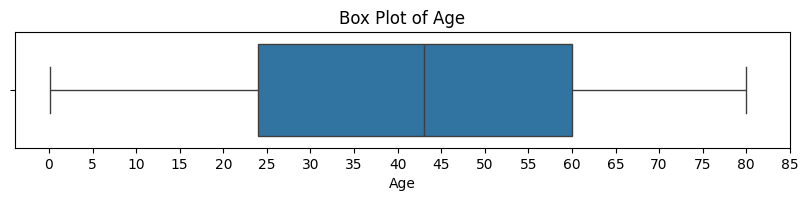

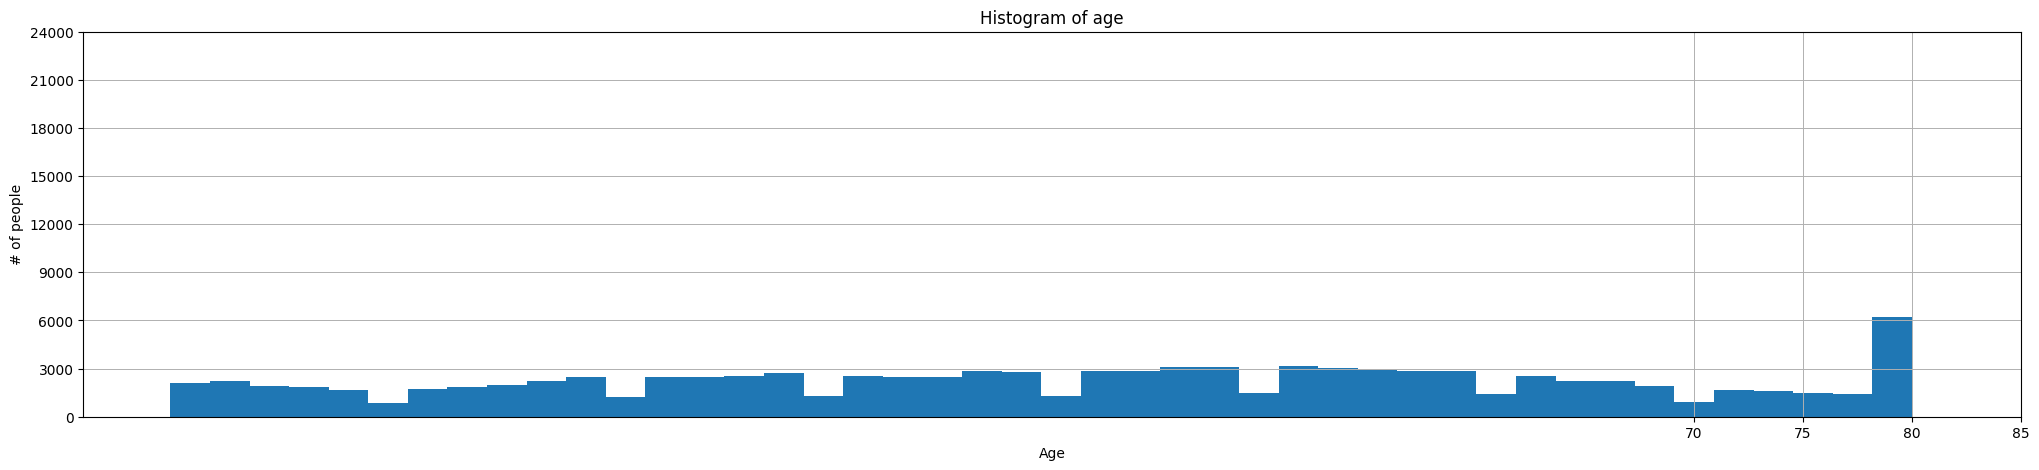

In [98]:
plt.figure(figsize=(10,1.5))
sns.boxplot(x = dataset["age"])
plt.xticks(np.arange(0, max(dataset["age"]+10), 5))
plt.title("Box Plot of Age")
plt.xlabel("Age")

plt.show()

plt.figure(figsize=(25,5))
plt.hist(dataset["age"], 44)
plt.title("Histogram of age")
plt.xlabel("Age")
plt.ylabel("# of people")
plt.xticks(np.arange(70, max(dataset["age"]+10), 5))
plt.yticks(np.arange(0, 25000, 3000))
plt.grid(True)
plt.grid(which='both', linestyle='-', linewidth=0.7)

plt.show()

**Hypertension**: Simple bar chart

Assuming 0 means no hypertension and 1 is positive for hypertension.

      ╔═════════════════════════╗
    0 ╢█████████████████████████╟ 9215
    1 ╢████████████████████░░░░░╟ 7485
      ╠═════════════════════════╣
      0                         9215

There are more samples of people without hypertension than with hypertension by a factor of about 1.2.

In [99]:
print(dataset['hypertension'].value_counts())

hypertension
0    92515
1     7485
Name: count, dtype: int64


**Heart Disease**: Simple bar chart
Assuming 0 means no heart disease and 1 is positive for heart disease.

      ╔════════════════════════════════════════════════════════════════════════════════════════════════════╗
    0 ╢████████████████████████████████████████████████████████████████████████████████████████████████████╟ 92515
    1 ╢████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░╟ 7485
      ╠════════════════════════════════════════════════════════════════════════════════════════════════════╣
      0                                                                                                    92515

This data has an overwhelming amount of samples from people who do not have heart disease, and few from people who do.

In [100]:
print(dataset['heart_disease'].value_counts())

heart_disease
0    96058
1     3942
Name: count, dtype: int64


**Smoking History**: Simple Bar Chart

                ╔════════════════════════════════════════╗
    No Info     ╢████████████████████████████████████████╟ 35816
    never       ╢███████████████████████████████████████░╟ 35095
    former      ╢██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░╟ 9352
    current     ╢██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░╟ 9286
    not current ╢███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░╟ 6447
    ever        ╢████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░╟ 4004
                ╠════════════════════════════════════════╣
                0                                        35816

There is a large amount of "No Info" and "never" data, compared to the rest of the results of the feature.
"not current" doesn't make much sense. It is unclear if it means if the person has ever smoked, or is planning to. If the person has smoked but is not a current smoker, this could be paired with "ever", or "former".

In [101]:
print(dataset['smoking_history'].value_counts())

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


**BMI**: Box Plot & Histogram

The BMI is has a distribution similar to a normal distribution, centered around the overwhelming majority of people having a BMI around 25 to 27.5.
There are many outliers when put into box plot format, which suggests there is much data that should be disregarded, or that the box plot is ineffective at presenting this data.

Execute the code below to view the diagrams.

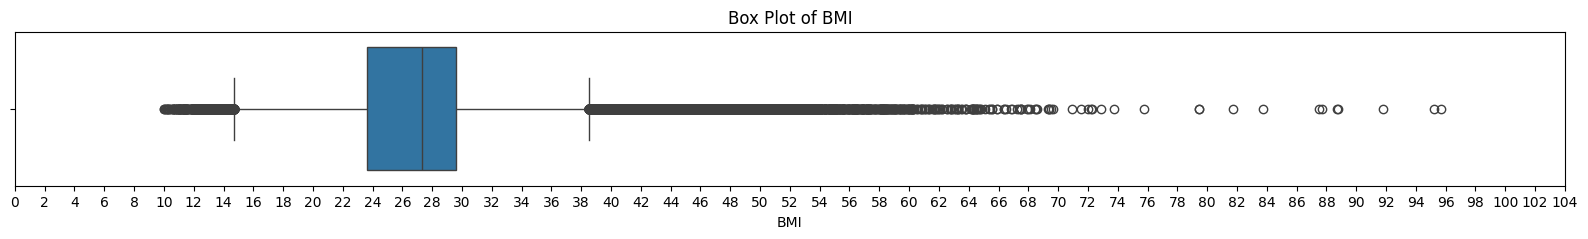

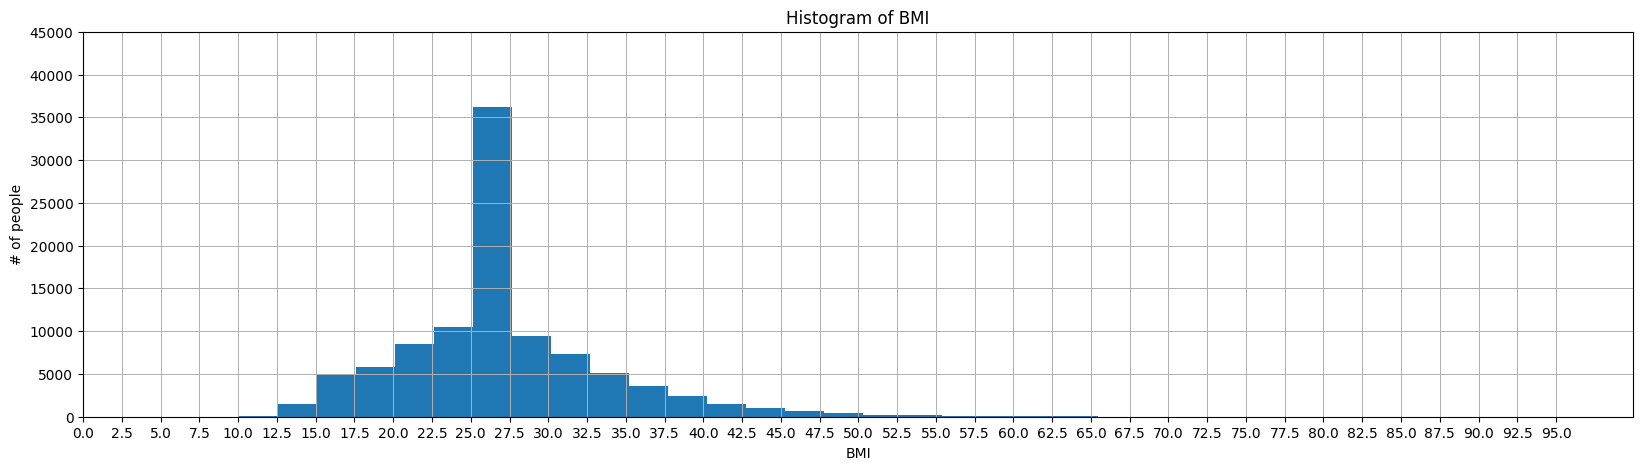

In [102]:
plt.figure(figsize=(20,2))
sns.boxplot(x = dataset["bmi"])
plt.xticks(np.arange(0, max(dataset["bmi"]+10), 2))
plt.title("Box Plot of BMI")
plt.xlabel("BMI")

plt.show()

plt.figure(figsize=(20,5))
plt.hist(dataset["bmi"], 34)
plt.title("Histogram of BMI")
plt.xlabel("BMI")
plt.ylabel("# of people")
plt.xticks(np.arange(0, max(dataset["bmi"]), 2.5))
plt.yticks(np.arange(0, 50000, 5000))
plt.grid(True)
plt.grid(which='both', linestyle='-', linewidth=0.7)

plt.show()

**HbA1c**: Box Plot & Histogram

The box plot shows there are a small few outliers. The histogram shows the data is spread out over different values. It is more concentrated in the 5.7 to 6.7 range, is spread out over 3.5 to 5.0, and has small occurrences at 7 onward.

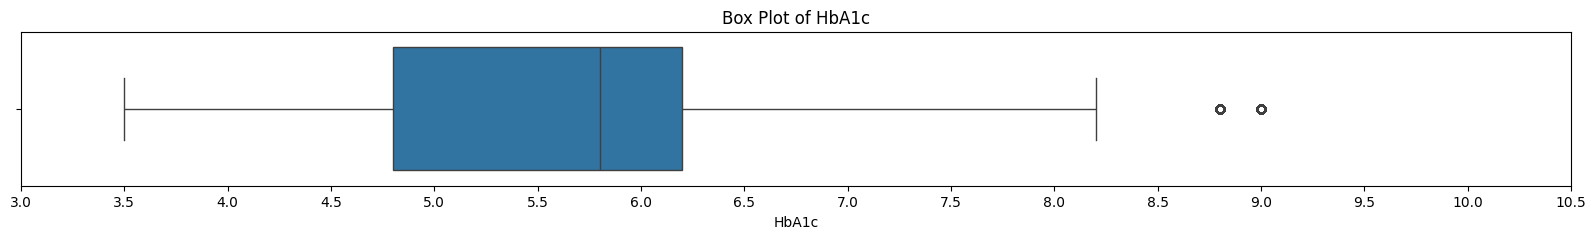

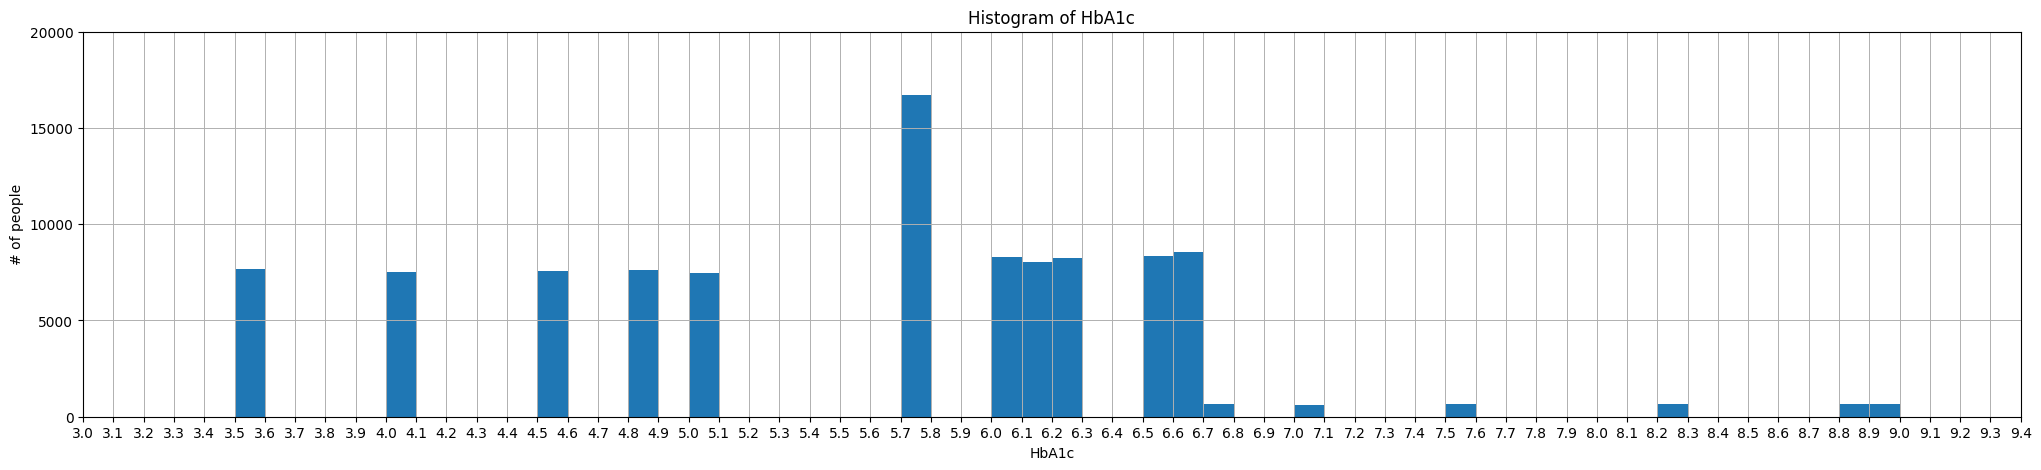

In [103]:
plt.figure(figsize=(20,2))
sns.boxplot(x = dataset["HbA1c_level"])
plt.xticks(np.arange(3, max(dataset["HbA1c_level"]+2), 0.5))
plt.title("Box Plot of HbA1c")
plt.xlabel("HbA1c")

plt.show()

plt.figure(figsize=(25,5))
plt.hist(dataset["HbA1c_level"], 55)
plt.title("Histogram of HbA1c")
plt.xlabel("HbA1c")
plt.ylabel("# of people")
plt.xticks(np.arange(3, max(dataset["HbA1c_level"]+0.5), 0.1))
plt.yticks(np.arange(0, 21000, 5000))
plt.grid(True)
plt.grid(which='both', linestyle='-', linewidth=0.7)

plt.show()


**Blood Glucose Level**: 

The data seems to have some spread across the <=100 range as well as the 125-165 range, with outliers showing at the further 200+ ranges

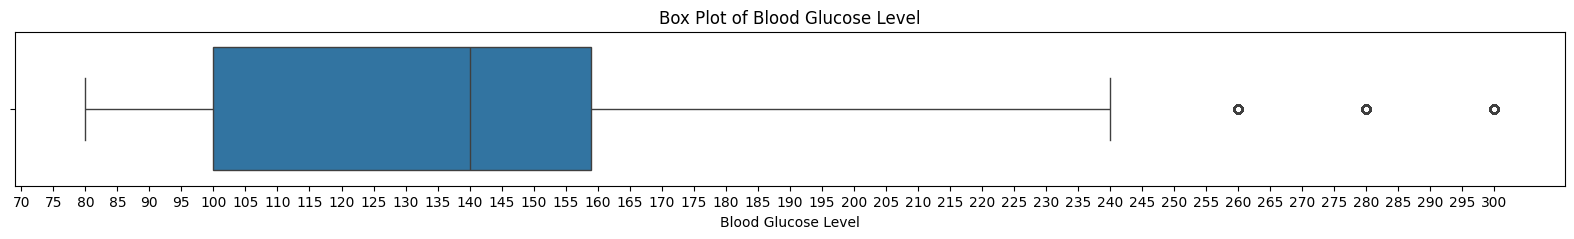

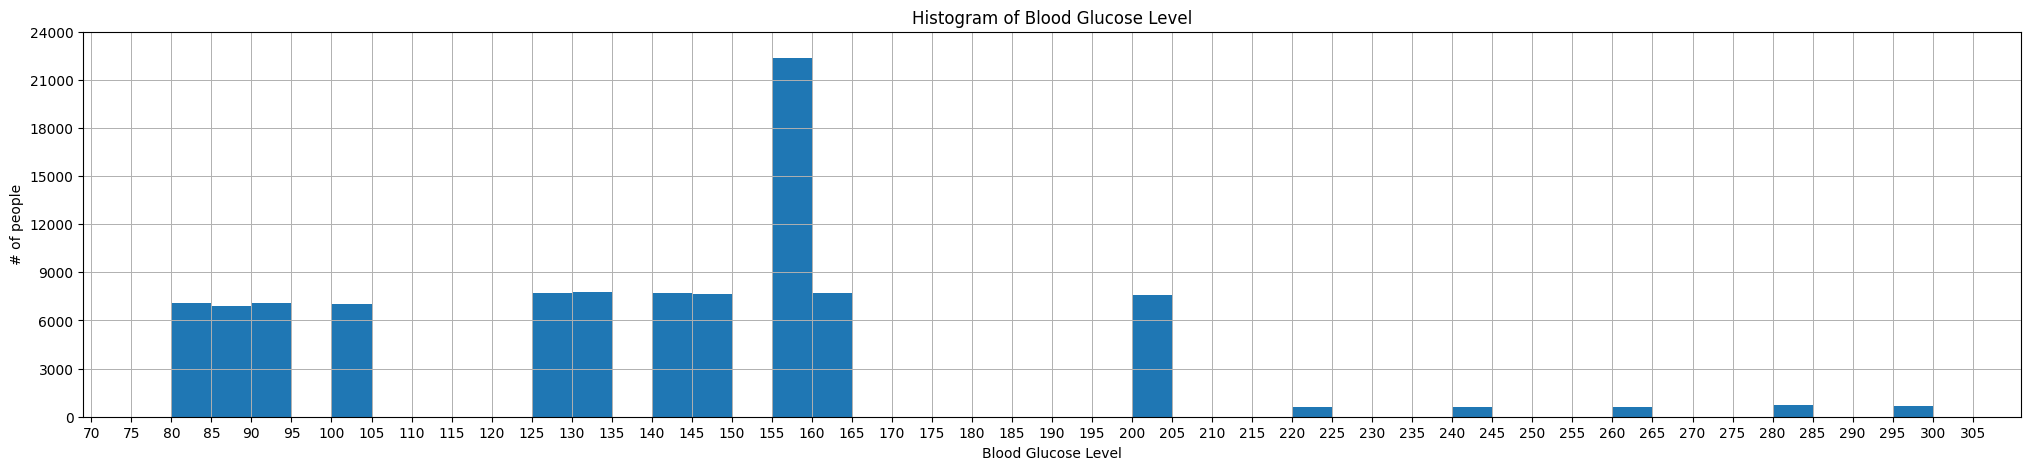

300 80


In [104]:
plt.figure(figsize=(20,2))
sns.boxplot(x = dataset["blood_glucose_level"])
plt.xticks(np.arange(70, max(dataset["blood_glucose_level"]+2), 5))
plt.title("Box Plot of Blood Glucose Level")
plt.xlabel("Blood Glucose Level")

plt.show()

plt.figure(figsize=(25,5))
plt.hist(dataset["blood_glucose_level"], 44)
plt.title("Histogram of Blood Glucose Level")
plt.xlabel("Blood Glucose Level")
plt.ylabel("# of people")
plt.xticks(np.arange(70, max(dataset["blood_glucose_level"]+10), 5))
plt.yticks(np.arange(0, 25000, 3000))
plt.grid(True)
plt.grid(which='both', linestyle='-', linewidth=0.7)

plt.show()

print(max(dataset["blood_glucose_level"]), min(dataset["blood_glucose_level"]))

3. **Target Variable Distribution**:

    - Analyze the distribution of the target variable to identify class imbalances. Use bar plots to visualize the class frequencies.

As shown in the bar graph below, the count of people without diabetes (0) is overwhelmingly larger than the count of people with diabetes (1).
```
  ╔═════════════════════════╗
0 ╢█████████████████████████╟ 91500
1 ╢██░░░░░░░░░░░░░░░░░░░░░░░╟ 8500
  ╠═════════════════════════╣
  0                         91500
```

Proof of metrics in the code cell below.

In [105]:
print(dataset["diabetes"].value_counts())

diabetes
0    91500
1     8500
Name: count, dtype: int64


4. **Data Splitting**:

    - Split the dataset into training (80%) and test (20%) sets using the holdout method.

    - Ensure that this split occurs before any preprocessing to avoid data leakage.

In [106]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    dataset[list(set(dataset.keys()) - {"diabetes"})],
    dataset["diabetes"],
    test_size = 0.2,
    # train_size = 0.8,
    random_state=420,
    shuffle=True
)

In [107]:
print(f"train - x: {x_train.shape}\ttrain - y: { y_train.shape}\ntest - x: {x_test.shape}\ttest - y: {y_test.shape}")

train - x: (80000, 8)	train - y: (80000,)
test - x: (20000, 8)	test - y: (20000,)


## Data Pre-Processing

5. **Categorical Variable Encoding**:

    - Encode any categorical variables. Justify the chosen method.

### smoking_history

Smoking history has been mapped using ordinal encoding. Smoking history is a gradient between never smoking to current smoker. Therefore, using ordinal encoding provides additional information based on relation between labels.

In [108]:
smoking_history_map = {
    "No Info": 1.5, # mid point value TODO replace with closet similarity value
    "never": 0,
    "former": 1,
    "not current": 2,
    "current": 3,
    "ever": 1.5, # mid point value TODO Drop rows as ever is 4% of all columns
}

In [109]:
x_train["smoking_history"] = x_train["smoking_history"].map(lambda x: smoking_history_map[x])

In [110]:
x_test["smoking_history"] = x_test["smoking_history"].map(lambda x: smoking_history_map[x])

### gender

Gender has be encoded using basically one-hot encoding. The labels have mapped such that male=>1 and female=>0. The "Other" label can be considered a missing value. The label consists of 0.008% of dataset and can be safely dropped with minimal affect to the final model.

In [111]:
y_train = y_train.loc[x_train['gender'].apply(lambda x: x != "Other")]
x_train = x_train.loc[x_train['gender'].apply(lambda x: x != "Other")]

y_test = y_test.loc[x_test['gender'].apply(lambda x: x != "Other")]
x_test = x_test.loc[x_test['gender'].apply(lambda x: x != "Other")]

In [112]:
x_train["gender"] = x_train["gender"].map(lambda x: 1 if x == "Male" else 0)
x_test["gender"] = x_test["gender"].map(lambda x: 1 if x == "Male" else 0)

6. **Normalization/Standardization of Numerical Features**:

    - Normalize or standardize numerical features if necessary. Describe the technique used (e.g., Min-Max scaling, StandardScaler) and explain why it is suitable for this dataset.

    - Ensure that this technique is applied only to the training data, with the same transformation subsequently applied to the test data without fitting on it.

In [113]:
def z_score_func(rows):
    mean = rows.mean()
    std = rows.std()

    return lambda x: (x - mean) / std

In [114]:
def norm(rows):
    m = rows.min()
    M = rows.max()

    return lambda x: (x-m)/(M-m)

## blood_glucose_level and HbA1c_level
The blood_glucose_level and HbA1c_level are both features with a sizeable portion of data-points near the median but, also have many many smaller cluster of outliers. Due to the outliers, a standardization was applied.

In [115]:
z_score = z_score_func(x_train["blood_glucose_level"])
x_train["blood_glucose_level"] = x_train["blood_glucose_level"].map(z_score)
x_test["blood_glucose_level"] = x_test["blood_glucose_level"].map(z_score)

In [116]:
z_score = z_score_func(x_train["HbA1c_level"])
x_train["HbA1c_level"] = x_train["HbA1c_level"].map(z_score)
x_test["HbA1c_level"] = x_test["HbA1c_level"].map(z_score)

# BMI
The bmi features has a normal distribution based on the initial analysis. Therefore, bmi should be standardized.

In [117]:
z_score = z_score_func(x_train["bmi"])
x_train["bmi"] = x_train["bmi"].map(z_score)
x_test["bmi"] = x_test["bmi"].map(z_score)

## Age
From the analysis, age does not process an normal distribution; and there exists an unlikely hood for an outlier. Therefore, should be normalized.

In [118]:
norm_func = norm(x_train["age"])
x_train["age"] = x_train["age"].map(norm_func)
x_test["age"] = x_test["age"].map(norm_func)

## Model Development & Evaluation

7. **Model Development**:

    - Implement the machine learning models covered in class: Decision Trees, K-Nearest Neighbors (KNN), and Logistic Regression. Use the default parameters of scikit-learn as a baseline for training each model.

In [135]:
from sklearn.neighbors import KNeighborsClassifier
knn_class = KNeighborsClassifier()

knn_class.fit(x_train, y_train)

KNeighborsClassifier()

In [136]:
from sklearn import tree
tree_class = tree.DecisionTreeClassifier(random_state = 420)
tree_class.fit(x_train, y_train)

DecisionTreeClassifier(random_state=420)

In [137]:
from sklearn.linear_model import LogisticRegression
log_reg_class = LogisticRegression(random_state=420)

log_reg_class.fit(x_train, y_train)

LogisticRegression(random_state=420)

8. **Model Evaluation**:

    - Use cross-validation to evaluate each model, justifying your choice of the number of folds.

    - Assess the models using metrics such as precision, recall, and F1-score.

In [138]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [139]:
pred_test = knn_class.predict(x_test)

knn_scores = pd.DataFrame(
    [
        [
            accuracy_score(pred_test, y_test),
            f1_score(pred_test, y_test),
            recall_score(pred_test, y_test),
            precision_score(pred_test, y_test)
        ]
    ],
    columns=["Accuracy", "F1 Score", "Recall", "Precision"]
)
knn_scores

,Accuracy,F1 Score,Recall,Precision
0,0.963639,0.755794,0.902889,0.649913


In [140]:
import numpy as np
pred_test = tree_class.predict(x_test)

tree_scores = pd.DataFrame(
    [
        [
            accuracy_score(pred_test, y_test),
            f1_score(pred_test, y_test),
            recall_score(pred_test, y_test),
            precision_score(pred_test, y_test)
        ]
    ],
    columns=["Accuracy", "F1 Score", "Recall", "Precision"]
)
tree_scores

,Accuracy,F1 Score,Recall,Precision
0,0.953836,0.738453,0.724694,0.752744


In [141]:
pred_test = log_reg_class.predict(x_test)

log_reg_class_scores = pd.DataFrame(
    [
        [
            accuracy_score(pred_test, y_test),
            f1_score(pred_test, y_test),
            recall_score(pred_test, y_test),
            precision_score(pred_test, y_test)
        ]
    ],
    columns=["Accuracy", "F1 Score", "Recall", "Precision"]
)
log_reg_class_scores

,Accuracy,F1 Score,Recall,Precision
0,0.960938,0.737302,0.882448,0.63316


## Hyperparameter Optimization

9. **Exploration and Performance Evaluation:**

    - Investigate the impact of varying hyperparameter values on the performance of each model.

    - Focus on the following relevant hyperparameters for each model:

        - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html): `criterion` and `max_depth`.
  
        - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html): `penalty`, `max_iter`, and `tol`.
  
        - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html): `n_neighbors` and `weights`.

    - Employ a grid search strategy or utilize scikit-learn's built-in methods to thoroughly evaluate all combinations of hyperparameter values. Cross-validation should be used to assess each combination.

    - Quantify the performance of each hyperparameter configuration using precision, recall, and F1-score as metrics.

    - Display the results in a tabular or graphical format (e.g., line charts, bar charts) to effectively demonstrate the influence of hyperparameter variations on model performance.

    - Specify the default values for each hyperparameter tested.

    - Analyze the findings and offer insights into which hyperparameter configurations achieved optimal performance for each model.

##### Optimal Hyperparameter Settings

**K-Nearest Neighbors**:\
neighbors: 5\
weights: distance

**Decision Tree**:\
max depths: 33\
criterions: log_loss

**Logistic Regression**:\
penalty: l2\
max_iter: 20\
tols: 100/100_000

In [142]:
metrics = [accuracy_score, f1_score, precision_score, recall_score]

accuracy_score


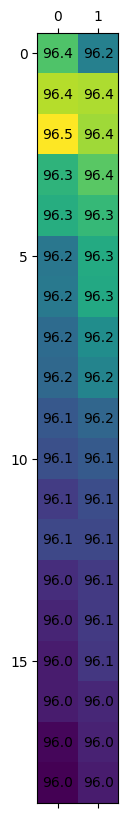

f1_score


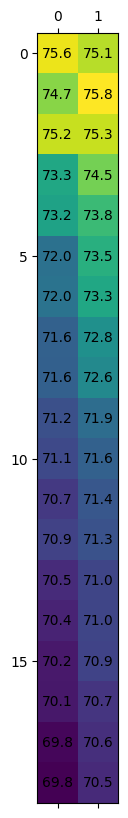

precision_score


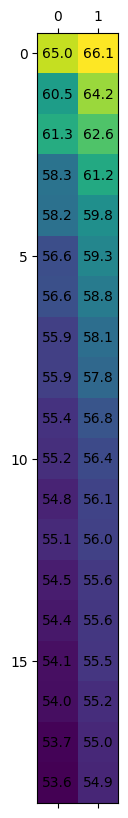

recall_score


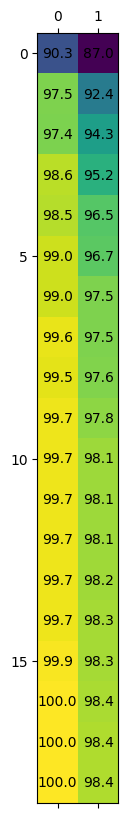

In [143]:
from matplotlib.pyplot import matshow
n_neighbors = [n for n in range(5, 100, 5)]
weights = ["uniform", "distance"]

scores = []

for n in n_neighbors:
    scores.append([])
    for weight in weights:
        knn_class = KNeighborsClassifier(n_neighbors=n, weights=weight, n_jobs=-1)
        knn_class.fit(x_train, y_train)

        scores[-1].append(tuple([m(knn_class.predict(x_test), y_test) for m in metrics]))

for k, metric in enumerate(metrics):
    print(metric.__name__)
    fig, ax = plt.subplots(figsize=(10, 10))

    ax.matshow([[scores[i][j][k] for j, _ in enumerate(scores[i])] for i, _ in enumerate(scores)])
    for i, _ in enumerate(scores):
        for j, _ in enumerate(scores[i]):
            ax.text(j, i, f'{scores[i][j][k]*100:0.1f}', ha='center', va='center',)
    plt.show()

accuracy_score


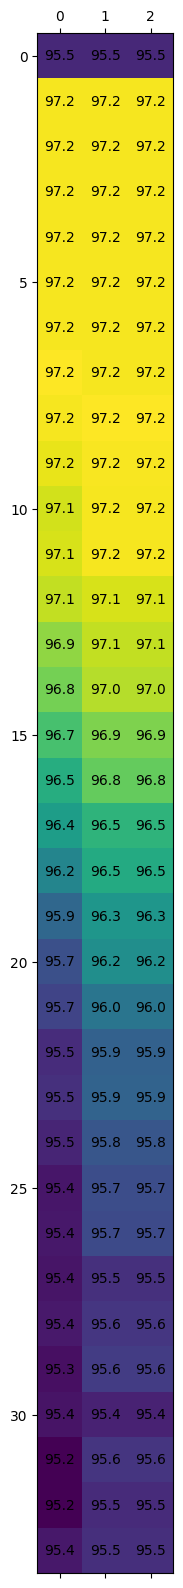

f1_score


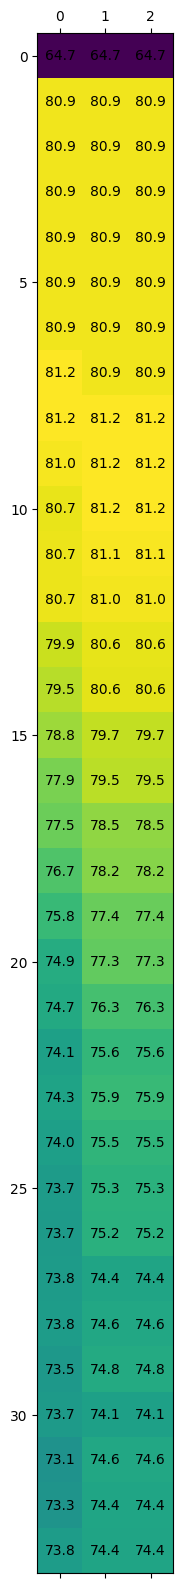

precision_score


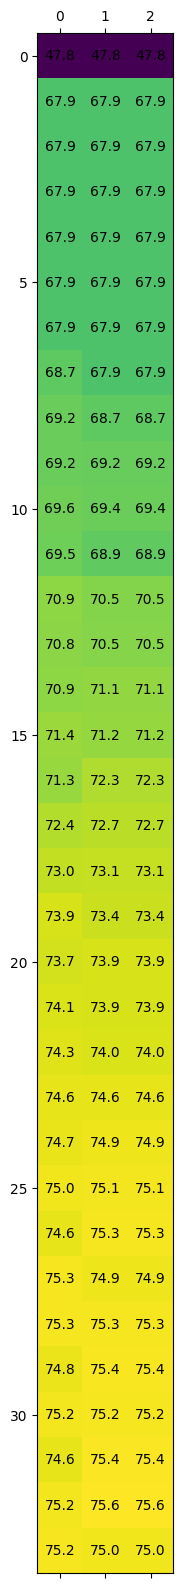

recall_score


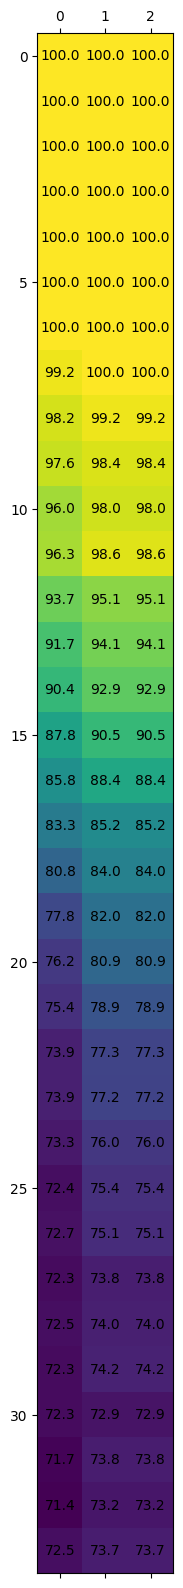

In [152]:
max_depths = [n for n in range(1, 35)]
criterions = ['gini', 'entropy', 'log_loss']

scores = []

for max_depth in max_depths:
    scores.append([])
    for criterion in criterions:
        tree_class = tree.DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, random_state = 420)
        tree_class.fit(x_train, y_train)

        scores[-1].append(tuple([m(tree_class.predict(x_test), y_test) for m in metrics]))

for k, metric in enumerate(metrics):
    print(metric.__name__)
    fig, ax = plt.subplots(figsize=(10, 20))
    ax.matshow([[scores[i][j][k] for j, _ in enumerate(scores[i])] for i, _ in enumerate(scores)])
    for i, _ in enumerate(scores):
        for j, _ in enumerate(scores[i]):
            ax.text(j, i, f'{scores[i][j][k]*100:0.1f}', ha='center', va='center',)
    plt.show()

l2
accuracy_score


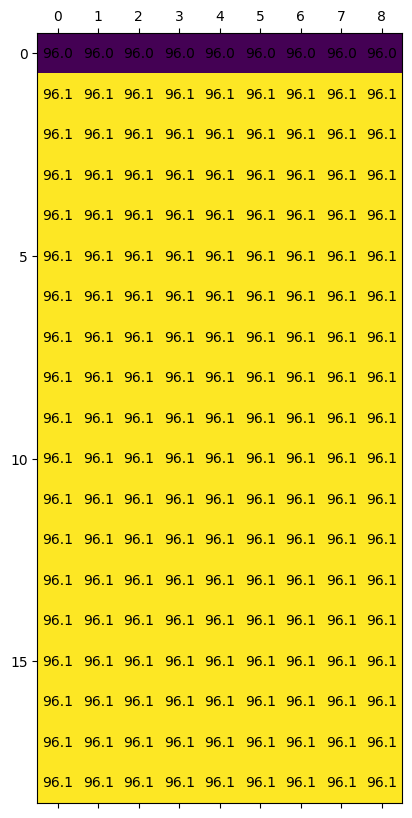

f1_score


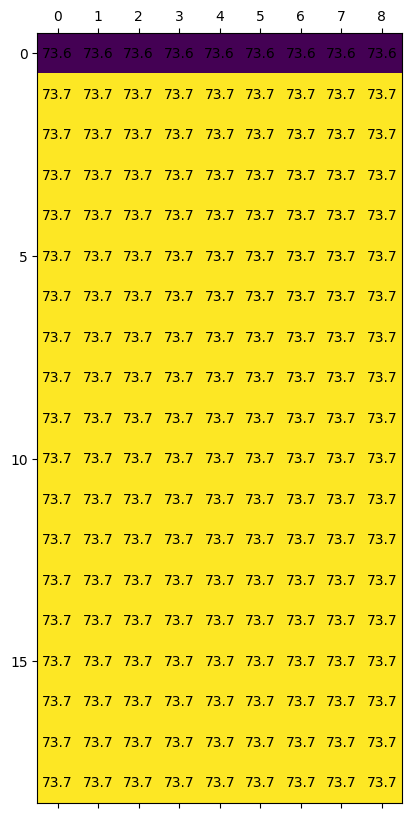

precision_score


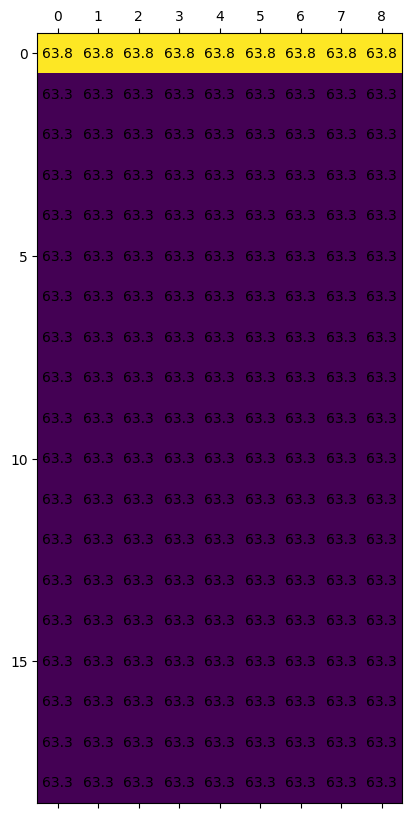

recall_score


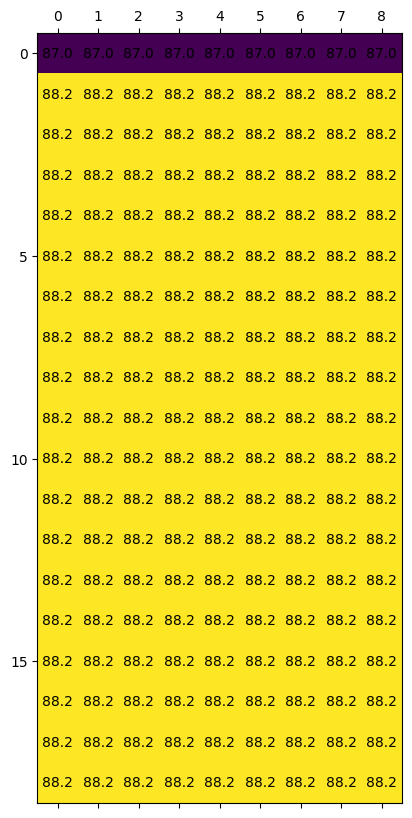

None
accuracy_score


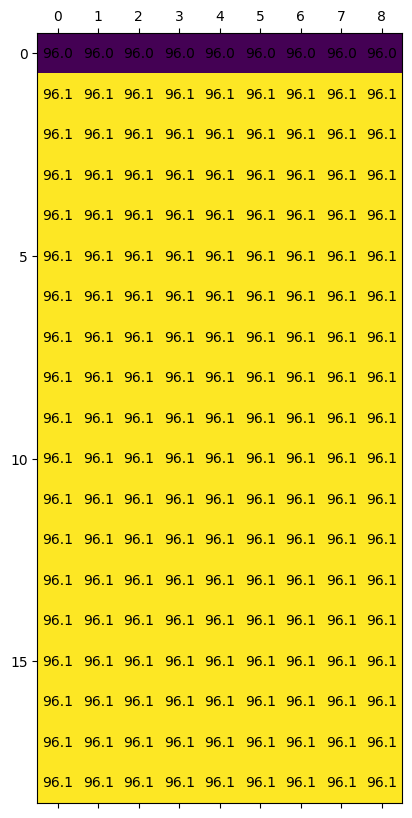

f1_score


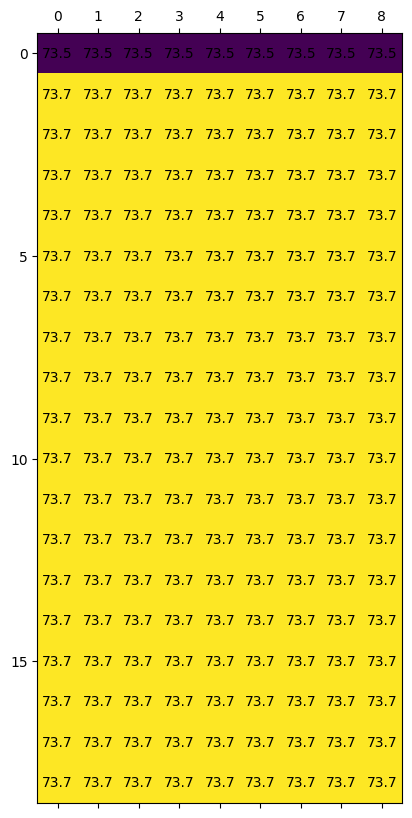

precision_score


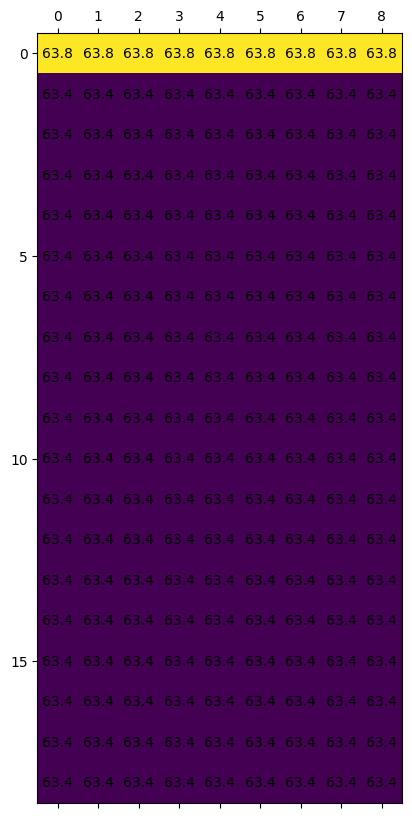

recall_score


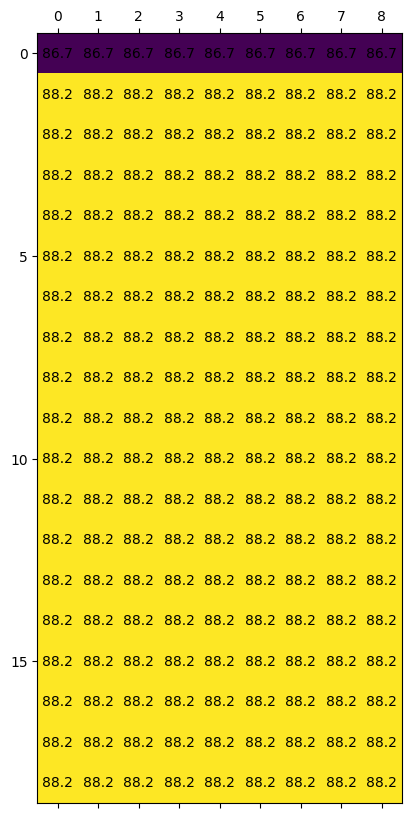

In [153]:
penalties = ['l2', None] #l1 & elasticnet doesn't work
max_iters = [n for n in range(10, 200, 10)]
tols = [float(n)/100_000.0 for n in range(100, 1000, 100)]

scores = []

for penalty in penalties:
    scores.append([])
    for max_iter in max_iters:
        scores[-1].append([])
        for tol in tols:
            log_reg_class = LogisticRegression(penalty=penalty, max_iter=max_iter, tol=tol, n_jobs=-1, random_state=420)
            log_reg_class.fit(x_train, y_train)

            scores[-1][-1].append(tuple([m(log_reg_class.predict(x_test), y_test) for m in metrics]))

for i, penalty in enumerate(penalties):
    print(penalty)
    for l, metric in enumerate(metrics):
        print(metric.__name__)
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.matshow([[scores[i][x][y][l] for y, _ in enumerate(scores[i][x])] for x, _ in enumerate(scores[i])])
        for j, _ in enumerate(scores[i]):
            for k, _ in enumerate(scores[i][j]):
                ax.text(k, j, f'{scores[i][j][k][l]*100:0.1f}', ha='center', va='center',)
        plt.show()

## Analysis of Results

10. **Model Comparison**:

    - Compare the results obtained from each model.

    - Discuss observed differences in model performance, providing potential explanations. Consider aspects such as model complexity, data imbalance, overfitting, and the impact of parameter tuning on overall results.

    - Provide recommendations on which model(s) to choose for this task and justify your choices based on the analysis results.

    - Train the recommended model(s) using the optimal parameter values identified from the parameter optimization step. Subsequently, apply the trained model to the test data. Document your observations comprehensively. Specifically, evaluate whether the results derived from cross-validation are consistent with those obtained from the test set.

### Best Model

The most important metric is precision. Since the dataset has a negative class imbalance. Therefore, it's important to maximize true positives - as every model will tend to have a high recall and accuracy.

Therefore, the best models are (based on the data section 9):
1. Decision Tree

In [162]:
tree_class = tree.DecisionTreeClassifier(max_depth=33, criterion="log_loss", random_state = 420)
tree_class.fit(x_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=33, random_state=420)

In [163]:
pred_test = tree_class.predict(x_train)

tree_scores = pd.DataFrame(
    [
        [
            accuracy_score(pred_test, y_train),
            f1_score(pred_test, y_train),
            recall_score(pred_test, y_train),
            precision_score(pred_test, y_train)
        ]
    ],
    columns=["Accuracy", "F1 Score", "Recall", "Precision"]
)
tree_scores

,Accuracy,F1 Score,Recall,Precision
0,0.999075,0.994506,0.999552,0.989511


In [164]:
pred_test = tree_class.predict(x_test)

tree_scores = pd.DataFrame(
    [
        [
            accuracy_score(pred_test, y_test),
            f1_score(pred_test, y_test),
            recall_score(pred_test, y_test),
            precision_score(pred_test, y_test)
        ]
    ],
    columns=["Accuracy", "F1 Score", "Recall", "Precision"]
)
tree_scores

,Accuracy,F1 Score,Recall,Precision
0,0.954936,0.743961,0.732103,0.75621


2. KNN Classification

In [191]:
knn_class = KNeighborsClassifier(n_neighbors=5, weights="distance", n_jobs=-1)
knn_class.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, weights='distance')

In [192]:
pred_test = knn_class.predict(x_train)

knn_scores = pd.DataFrame(
    [
        [
            accuracy_score(pred_test, y_train),
            f1_score(pred_test, y_train),
            recall_score(pred_test, y_train),
            precision_score(pred_test, y_train)
        ]
    ],
    columns=["Accuracy", "F1 Score", "Recall", "Precision"]
)
knn_scores

,Accuracy,F1 Score,Recall,Precision
0,0.9992,0.995252,0.999702,0.990841


In [193]:
pred_test = knn_class.predict(x_test)

knn_scores = pd.DataFrame(
    [
        [
            accuracy_score(pred_test, y_test),
            f1_score(pred_test, y_test),
            recall_score(pred_test, y_test),
            precision_score(pred_test, y_test)
        ]
    ],
    columns=["Accuracy", "F1 Score", "Recall", "Precision"]
)
knn_scores

,Accuracy,F1 Score,Recall,Precision
0,0.962089,0.751149,0.869962,0.66089


3. Logistic Regression

In [186]:
log_reg_class = LogisticRegression(penalty="l2", max_iter=20, tol=100./100000.,  random_state=420)
log_reg_class.fit(x_train, y_train)

c:\Users\hasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=20, random_state=420, tol=0.001)

In [189]:
pred_test = log_reg_class.predict(x_train)

log_scores = pd.DataFrame(
    [
        [
            accuracy_score(pred_test, y_train),
            f1_score(pred_test, y_train),
            recall_score(pred_test, y_train),
            precision_score(pred_test, y_train)
        ]
    ],
    columns=["Accuracy", "F1 Score", "Recall", "Precision"]
)
log_scores

,Accuracy,F1 Score,Recall,Precision
0,0.959981,0.725024,0.866174,0.62343


In [190]:
pred_test = log_reg_class.predict(x_test)

log_scores = pd.DataFrame(
    [
        [
            accuracy_score(pred_test, y_test),
            f1_score(pred_test, y_test),
            recall_score(pred_test, y_test),
            precision_score(pred_test, y_test)
        ]
    ],
    columns=["Accuracy", "F1 Score", "Recall", "Precision"]
)
log_scores

,Accuracy,F1 Score,Recall,Precision
0,0.960938,0.737302,0.882448,0.63316


The tree model performs the best when the max_depth is set to 33 and the criterion is set to"log_loss".


However, the best model can change if the following recommendations if oversampling, undersampling or k-fold partitioning. After, a series of preliminary tests - it has shown the updating the training dataset improves performance by 5-10% (oversampling the positive label).

## 2. Documentation of Exploratory Analysis

The report should comprehensively document the entire process followed during this assignment. The Jupyter Notebook must include the following:

- Your name(s), student number(s), and a report title.
- Explain how the tasks have been split between the members. How did you make sure that both students achieve the learning outcomes? 
- A section for each step of the exploratory analysis, containing the relevant Python code and explanations or results.
  - For sections requiring Python code, include the code in a cell.
  - For sections requiring explanations or results, include these in a separate cell or in combination with code cells.
- Ensure logical separation of code into different cells. For example, the definition of a function should be in one cell and its execution in another. Avoid placing too much code in a single cell to maintain clarity and readability.
- The notebook you submit must include the results of the execution, complete with graphics, ensuring that the teaching assistant can grade the notebook without needing to execute the code.

# Report

Shacha Parker
300235525

Hasin Zaman
300148066

We tried our utmost to divide tasks equally, and then share and explain what we were doing at each step. We gave feedback and checked each other's work to verify functionality as well as to achieve understanding of each other's parts.

All parts of exploratory analysis had the relevant code displayed next to the results, executable in the respective cells.

# Resources
https://www.datacamp.com/tutorial/python-boxplots \
https://www.geeksforgeeks.org/matplotlib-pyplot-xticks-in-python/ \
https://www.geeksforgeeks.org/matplotlib-pyplot-xticks-in-python/ \
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html \
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html \
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit \
https://scikit-learn.org/stable/modules/tree.html#regression \
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression \
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow